<span style="font-size:13px;">


#### 토픽 모델링 : 여러 문서 속에서 공통적으로 등장하는 ‘주제(Topic)’를 자동으로 찾아내는 방법
- LDA : 문서 컬렉션에서 숨겨진 주제를 찾아내는 생성형 모델
    - `document` : 여러 topics의 혼합
    - `topic` : 여러 word의 분포
    - `word` : 특정 topic에서 생성된 단어
    - 문서들은 topic의 혼합으로 구성
        - 뉴스기사
            - 70% 정치 / 20% 경제 / 10% 스포츠
        - 토픽은 단어 분포를 갖는다
            - 정치는 {선거: 0.2, 대통령: 0.15,  정부: 0.1...}
            - 경제는 {주식 : 0.25, 금리: 0.2, 은행:0.15...}
    - 모든 문서를 토픽의 혼합, 토픽별로 단어 분포를 랜덤하게 초기화
        - 과정을 반복하면
            - 각 단어가 어떤 토픽에서 나왔는지 추정
            - 각 토픽의 단어 분포를 업데이트


In [5]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

documents = [
    "Python 프로그래밍은 매우 강력하고 배우기 쉬워요",
    "머신러닝은 인공지능의 핵심 기술입니다",
    "자연어처리는 NLP라고도 불립니다",
    "딥러닝은 신경망을 이용한 학습 방법입니다",
    "데이터 분석은 통계학에 기반합니다",
    "파이썬으로 머신러닝 모델을 만들 수 있습니다",
    "인공지능 기술은 빠르게 발전하고 있습니다",
    "자연어처리 모델은 텍스트를 이해할 수 있어요"
]

# 단어 벡터화
from konlpy.tag import Okt

cv = CountVectorizer(
    max_features= 50,
    stop_words=['은','는','이','가','을','를','그리고','그'],
    min_df = 1,
    max_df= 0.9
)
doc_term_matrix = cv.fit_transform(documents)
feature_names = cv.get_feature_names_out()
print(f'문서 단어 행렬 : {doc_term_matrix.shape}')
print(f'단어목록 : {feature_names} 단어목록 개수:{len(feature_names)}')


문서 단어 행렬 : (8, 36)
단어목록 : ['nlp라고도' 'python' '강력하고' '기반합니다' '기술은' '기술입니다' '데이터' '딥러닝은' '만들' '매우'
 '머신러닝' '머신러닝은' '모델은' '모델을' '발전하고' '방법입니다' '배우기' '분석은' '불립니다' '빠르게' '쉬워요'
 '신경망을' '이용한' '이해할' '인공지능' '인공지능의' '있습니다' '있어요' '자연어처리' '자연어처리는' '텍스트를'
 '통계학에' '파이썬으로' '프로그래밍은' '학습' '핵심']단어목록 개수:36


In [17]:
# LDA 모델 생성
lda_model = LatentDirichletAllocation(
    n_components=3,     # 토픽(주제)의 개수
    random_state=42,
    max_iter=20,
    learning_method='online',   # batch (모든 데이터를 한 번에 다 써서 한 번 학습), online = mini batch
    )
# 모델 학습
lda_output = lda_model.fit_transform(doc_term_matrix)
print(f'문서-주제 행렬 : {lda_output.shape}')
print(f'첫 번쨰 문서의 주제 분포')
print(f'Topic 0 : {lda_output[0,0]:.4f}')
print(f'Topic 1 : {lda_output[0,1]:.4f}')
print(f'Topic 2 : {lda_output[0,2]:.4f}')

# 각 주제별로 상위 단어 출력
def display_topic(model, feature_nams, n_top_words = 5):
    print(f'각 주제별 상위 단어----------------')
    for topic_idx, topic in enumerate(model.components_):
        # 가장 높은 가중치를 가진 단어의 인덱스 호출
        top_words_idx = topic.argsort()[-n_top_words:][::-1]
        top_words = [ feature_nams[i] for i in top_words_idx]
        top_weights = [ topic[i] for i in top_words_idx ]
        print(f'[topic {topic_idx}]')
        for word,weight in zip(top_words,top_weights):
            print(f'  {word} : {weight:.4f}')
        print()
display_topic(lda_model, feature_names,n_top_words=5)

문서-주제 행렬 : (8, 3)
첫 번쨰 문서의 주제 분포
Topic 0 : 0.0481
Topic 1 : 0.0483
Topic 2 : 0.9036
각 주제별 상위 단어----------------
[topic 0]
  기술은 : 1.3185
  모델은 : 1.3178
  핵심 : 1.3125
  인공지능 : 1.3124
  기술입니다 : 1.3116

[topic 1]
  있습니다 : 1.3128
  모델을 : 1.3109
  데이터 : 1.3104
  분석은 : 1.3095
  머신러닝 : 1.3091

[topic 2]
  매우 : 1.3191
  강력하고 : 1.3182
  python : 1.3135
  nlp라고도 : 1.3131
  배우기 : 1.3099



In [19]:
# 각 문서의 주요 주제
print(f'각 문서의 주요 주제----------------')
for doc_idx, doc in enumerate(lda_output):
    main_topic = np.argmax(doc)
    confidence = doc[main_topic]
    print(f'문서 : {doc_idx} topic : {main_topic} 비율 : {confidence:.4f}')
    print(f'원문 : {documents[doc_idx]}')
    print()

각 문서의 주요 주제----------------
문서 : 0 topic : 2 비율 : 0.9036
원문 : Python 프로그래밍은 매우 강력하고 배우기 쉬워요

문서 : 1 topic : 0 비율 : 0.8650
원문 : 머신러닝은 인공지능의 핵심 기술입니다

문서 : 2 topic : 2 비율 : 0.8312
원문 : 자연어처리는 NLP라고도 불립니다

문서 : 3 topic : 2 비율 : 0.8876
원문 : 딥러닝은 신경망을 이용한 학습 방법입니다

문서 : 4 topic : 1 비율 : 0.8655
원문 : 데이터 분석은 통계학에 기반합니다

문서 : 5 topic : 1 비율 : 0.8867
원문 : 파이썬으로 머신러닝 모델을 만들 수 있습니다

문서 : 6 topic : 0 비율 : 0.8855
원문 : 인공지능 기술은 빠르게 발전하고 있습니다

문서 : 7 topic : 0 비율 : 0.8876
원문 : 자연어처리 모델은 텍스트를 이해할 수 있어요



In [23]:
# 청와대 국민청원 데이터로드
import os
import urllib.request
import ssl
url = 'https://s3.ap-northeast-2.amazonaws.com/data10902/petition/petition_sampled.csv'

# ssl 인증서 무시
ssl._create_default_https_context = ssl._create_unverified_context

urllib.request.urlretrieve(url,'./sample.csv')

('./sample.csv', <http.client.HTTPMessage at 0x25858f51d50>)

In [ ]:
import pandas as pd
df = pd.read_csv("sample.csv", nrows = 1000)    # 실행속도 때문에 1000개만 가져옴
df.head()

,article_id,start,end,answered,votes,category,title,content
0,58,2017-08-19,2017-11-17,0,21,일자리,국토교통부와 한국주택협회가 행한 부당한 행위와 권력남용에 대한 내용을 청원드립니다.,안녕하세요? 존경하고 지지하는 문재인 대통령님!\n저는 성남시 분당구 정자동 주택전...
1,63,2017-08-20,2017-09-04,0,1,보건복지,살려주세요..,안녕하십니까?\n저는 올해 63세된 홀로 사는 늙은 여자입니다...\n작년 중복날 ...
2,136,2017-08-20,2017-11-18,0,4,육아/교육,고등학교 교육 내용 수준을 낮춰주시고 실용적인 내용을 담아주세요!,저는 광주에 사는 중3 학생입니다. 고등학교 가기 직전의 학년이라 어느 때보다 고등...
3,141,2017-08-20,2017-08-27,0,0,기타,한국문화에 창조적요소를 심자,안녕하십니까\n저는 92년 한국을 알게된 종국동포 입니다.\n[저는 한 중소기업에...
4,148,2017-08-20,2017-11-18,0,7,외교/통일/국방,다문화정책 및 할랄 인증 제도,대한민국과 국민을 위해 밤낮 없이 수고하시는 대통령을 비롯한 위정자 분들께\n대한민...


In [32]:
# 한국어 전처리
from sklearn.feature_extraction.text import CountVectorizer
from konlpy.tag import Okt
okt = Okt()
# 명사만, 그리고 한글자 이상만
def tokenizer(doc):
    return [ token for token in okt.nouns(doc) if len(token) > 1]

cv = CountVectorizer(
    max_features= 1000,
    min_df = 5,
    max_df= 0.5,
    tokenizer= tokenizer
)
pet_cv = cv.fit_transform(df.content)
print(f'CountVectorizer 형태 : {pet_cv.shape}')

CountVectorizer 형태 : (1000, 1000)


In [33]:
len(df.category.unique())

17

In [46]:
# LDA 모델 학습
from sklearn.decomposition import LatentDirichletAllocation
import time
# 시간측정
start_time = time.time()
lda = LatentDirichletAllocation(n_components=15, n_jobs= -1, random_state=42)
pet_topics = lda.fit_transform(pet_cv)
elapsed_time = time.time() - start_time
print(f'lda 학습시간 : {elapsed_time:.2f}초')

lda 학습시간 : 22.22초


In [47]:
# 토픽단어 출력함수
def print_top_words(model, feature_names, n_top_words):
    for topicidx, topic in enumerate(model.components_):
        print(f"Topic #{topicidx}: ", end='')
        top_indices = topic.argsort()[:-n_top_words-1:-1]
        top_words = [feature_names[i] for i in top_indices]
        print(", ".join(top_words))

feature_names = cv.get_feature_names_out()
print_top_words(lda, feature_names, 15)

Topic #0: 교사, 기간, 임용, 강사, 시험, 정규직, 교대, 대통령, 공무원, 학생, 초등, 스포츠, 근무, 지역, 비정규직
Topic #1: 경찰, 신고, 조사, 사건, 민원, 유치원, 연락, 사람, 내용, 처리, 병원, 전화, 상태, 경찰서, 담당자
Topic #2: 국민, 생각, 사업, 주택, 업체, 문제, 아파트, 협회, 주민, 지금, 정부, 계약, 운영, 관리, 청원
Topic #3: 아이, 학교, 학교폭력, 교사, 보육, 학생, 피해, 어린이집, 사건, 대한, 인상, 폭력, 우리, 선생님, 가정
Topic #4: 대한, 근로자, 경우, 의무, 헌법, 위반, 지급, 발생, 권리, 현재, 근로, 법률, 노동자, 침해, 개인
Topic #5: 건강, 보험, 소득, 보험료, 지역, 대통령, 지금, 정말, 센터, 우리, 세금, 기준, 의료, 인터넷, 제도
Topic #6: 여성, 생각, 정책, 의무, 제도, 문제, 사회, 국방, 대한민국, 수도, 남성, 국가, 지원, 국민, 사람
Topic #7: 청소년, 보호, 폐지, 소년법, 아이, 범죄, 생각, 분양, 악용, 요즘, 처벌, 성인, 미래, 위해, 이유
Topic #8: 생각, 사람, 나라, 훈련, 저희, 문제, 지금, 우리나라, 여자, 남자, 마음, 시간, 군대, 업무, 사회
Topic #9: 처벌, 사건, 청소년, 폭행, 피해자, 가해자, 생각, 부산, 여중생, 폐지, 범죄, 소년법, 사람, 학생, 인권
Topic #10: 보험, 치료, 회사, 건강, 사람, 병원, 입원, 어머니, 환자, 민원, 국민, 정부, 때문, 진료, 교통사고
Topic #11: 질병, 국가, 청원, 발생, 훈련, 수행, 병원, 관련, 사건, 치료, 입대, 직무, 교육, 결정, 해당
Topic #12: 북한, 대통령, 문재인, 러시아, 정부, 한국, 협력, 미국, 문제, 한반도, 중국, 관계, 우리, 사업, 전쟁
Topic #13: 교육, 학교, 학생, 교실, 초등, 지자체, 사람, 기간, 아이, 학부모, 시험, 운영, 반

In [51]:
# 토픽 트랜드 분석
# 시간 정보 추출
df['period'] = pd.to_datetime(df['start']).dt.strftime('%Y-%m')
# 토픽 데이터 프레임
topic_columns = [f'Topic{i}'for i in range(15)]
trend_data = pd.DataFrame(pet_topics,columns=topic_columns)
trend_data['period'] = df['period'].values
trend_data.head()

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,Topic13,Topic14,period
0,0.000309,0.082285,0.764552,0.000309,0.126300,0.000309,0.000309,0.000309,0.000309,0.000309,0.000309,0.023468,0.000309,0.000309,0.000309,2017-08
1,0.000784,0.096244,0.000784,0.000784,0.000784,0.386595,0.000784,0.000784,0.220655,0.000784,0.287878,0.000784,0.000784,0.000784,0.000784,2017-08
2,0.001418,0.001418,0.001418,0.001418,0.001418,0.001418,0.001418,0.001418,0.001418,0.001418,0.001418,0.001418,0.001418,0.001418,0.980142,2017-08
3,0.000230,0.000230,0.081722,0.000230,0.000230,0.000230,0.137700,0.000230,0.000230,0.000230,0.114121,0.000230,0.570698,0.000230,0.093460,2017-08
4,0.000480,0.041855,0.168071,0.000480,0.051915,0.000480,0.344549,0.000480,0.000480,0.044264,0.000480,0.000480,0.145024,0.000480,0.200485,2017-08


In [52]:
import matplotlib.pyplot as plt

#한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


기간별 토픽 분포:
           Topic0    Topic1    Topic2  ...   Topic12   Topic13   Topic14
period                                 ...                              
2017-08  0.087445  0.083210  0.122990  ...  0.088747  0.044827  0.042827
2017-09  0.029048  0.041291  0.063340  ...  0.043333  0.040816  0.040034
2017-10  0.027522  0.041129  0.036333  ...  0.061740  0.050205  0.177815

[3 rows x 15 columns]


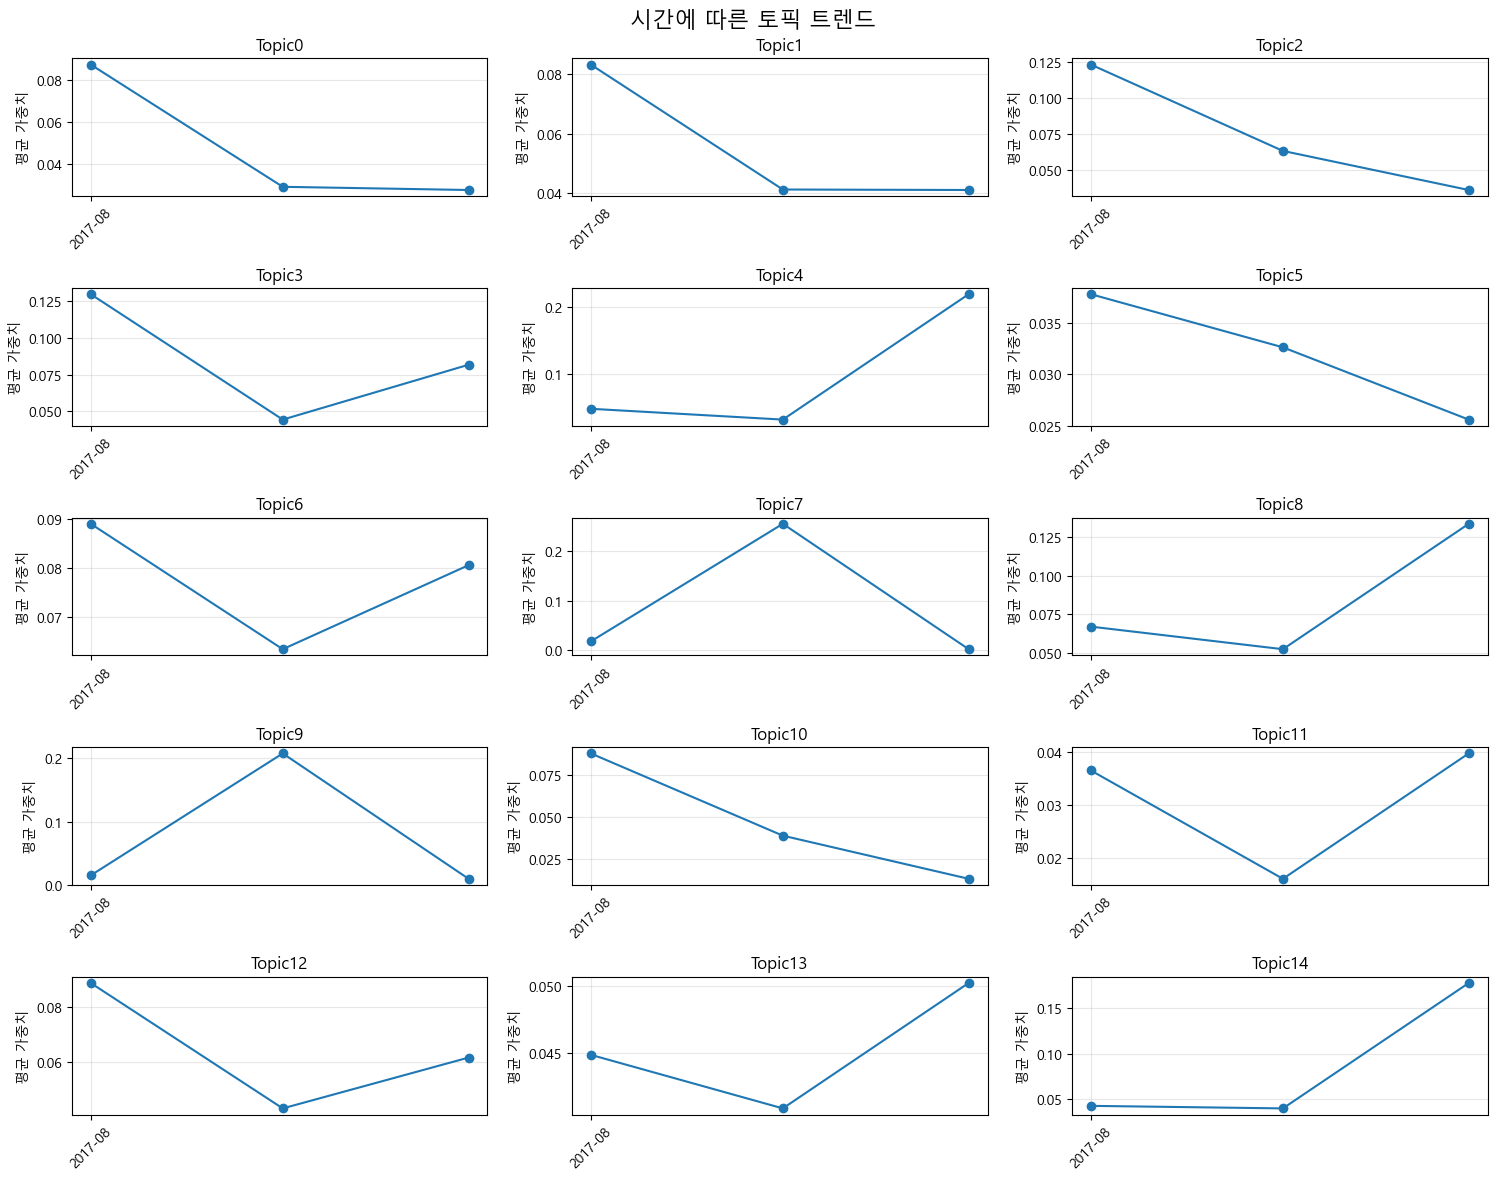

In [53]:
# 기간별 평균 토픽 가중치 계산
trend = trend_data.groupby('period').mean()

print("\n기간별 토픽 분포:")
print(trend.head())

# 시간 트렌드 시각화
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, axes = plt.subplots(5, 3, figsize=(15, 12))
fig.suptitle('시간에 따른 토픽 트렌드', fontsize=16)

# x축을 datetime으로 변환
trend.index = pd.to_datetime(trend.index)
trend_sorted = trend.sort_index()

for idx, (ax, topic) in enumerate(zip(axes.flat, topic_columns)):
    ax.plot(trend_sorted.index, trend_sorted[topic], marker='o')
    ax.set_title(topic)
    ax.set_ylabel('평균 가중치')
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [56]:
df.category.unique()
print_top_words(lda, feature_names, 15)

Topic #0: 교사, 기간, 임용, 강사, 시험, 정규직, 교대, 대통령, 공무원, 학생, 초등, 스포츠, 근무, 지역, 비정규직
Topic #1: 경찰, 신고, 조사, 사건, 민원, 유치원, 연락, 사람, 내용, 처리, 병원, 전화, 상태, 경찰서, 담당자
Topic #2: 국민, 생각, 사업, 주택, 업체, 문제, 아파트, 협회, 주민, 지금, 정부, 계약, 운영, 관리, 청원
Topic #3: 아이, 학교, 학교폭력, 교사, 보육, 학생, 피해, 어린이집, 사건, 대한, 인상, 폭력, 우리, 선생님, 가정
Topic #4: 대한, 근로자, 경우, 의무, 헌법, 위반, 지급, 발생, 권리, 현재, 근로, 법률, 노동자, 침해, 개인
Topic #5: 건강, 보험, 소득, 보험료, 지역, 대통령, 지금, 정말, 센터, 우리, 세금, 기준, 의료, 인터넷, 제도
Topic #6: 여성, 생각, 정책, 의무, 제도, 문제, 사회, 국방, 대한민국, 수도, 남성, 국가, 지원, 국민, 사람
Topic #7: 청소년, 보호, 폐지, 소년법, 아이, 범죄, 생각, 분양, 악용, 요즘, 처벌, 성인, 미래, 위해, 이유
Topic #8: 생각, 사람, 나라, 훈련, 저희, 문제, 지금, 우리나라, 여자, 남자, 마음, 시간, 군대, 업무, 사회
Topic #9: 처벌, 사건, 청소년, 폭행, 피해자, 가해자, 생각, 부산, 여중생, 폐지, 범죄, 소년법, 사람, 학생, 인권
Topic #10: 보험, 치료, 회사, 건강, 사람, 병원, 입원, 어머니, 환자, 민원, 국민, 정부, 때문, 진료, 교통사고
Topic #11: 질병, 국가, 청원, 발생, 훈련, 수행, 병원, 관련, 사건, 치료, 입대, 직무, 교육, 결정, 해당
Topic #12: 북한, 대통령, 문재인, 러시아, 정부, 한국, 협력, 미국, 문제, 한반도, 중국, 관계, 우리, 사업, 전쟁
Topic #13: 교육, 학교, 학생, 교실, 초등, 지자체, 사람, 기간, 아이, 학부모, 시험, 운영, 반